# Split

In [62]:
import splitfolders



input_folder = r"..\KoleksiDataset\BodyParts_NoSplit"
output_folder = r"..\KoleksiDataset\BodyParts_Split"

splitfolders.ratio(input_folder, output=output_folder,
    seed=899, ratio=(.8, .15, .05), group_prefix=None) # default values

# Setup Directories & Variables

In [63]:
import os
import tensorflow as tf

base_dir = os.path.join(r'..\KoleksiDataset\BodyParts_Split')

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

ear_train = os.path.join(train_dir, 'ear')
eye_train = os.path.join(train_dir, 'eye')
mouth_train = os.path.join(train_dir, 'mouth')
hand_train = os.path.join(train_dir, 'hand')
nose_train = os.path.join(train_dir, 'nose')

ear_val = os.path.join(validation_dir, 'ear')
eye_val = os.path.join(validation_dir, 'eye')
mouth_val = os.path.join(validation_dir, 'mouth')
hand_val = os.path.join(validation_dir, 'hand')
nose_val = os.path.join(validation_dir, 'nose')

ear_test = os.path.join(test_dir, 'ear')
eye_test = os.path.join(test_dir, 'eye')
mouth_test = os.path.join(test_dir, 'mouth')
hand_test = os.path.join(test_dir, 'hand')
nose_test = os.path.join(test_dir, 'nose')

class_names = ['Ear', 'Eye', 'Hand', 'Mouth', 'Nose']
print(class_names)


['Ear', 'Eye', 'Hand', 'Mouth', 'Nose']


# Cek Dalam Folder

In [44]:
train_ear_names = os.listdir(ear_train)
print(f'TRAIN SET EAR: {train_ear_names[:10]}')

train_eye_names = os.listdir(eye_train)
print(f'TRAIN SET Eye: {train_eye_names[-10:]}')

val_eye_names = os.listdir(eye_val)
print(f'Val SET Eye: {val_eye_names[:10]}')

val_ear_names = os.listdir(ear_val)
print(f'Val SET EAR: {val_ear_names[:10]}')

TRAIN SET EAR: ['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1006.jpg', '1007.jpg']
TRAIN SET Eye: ['984.jpg', '988.jpg', '989.jpg', '990.jpg', '991.jpg', '994.jpg', '995.jpg', '996.jpg', '997.jpg', '998.jpg']
Val SET Eye: ['1008.jpg', '1009.jpg', '1015.jpg', '1016.jpg', '1018.jpg', '1020.jpg', '1039.jpg', '1054.jpg', '1059.jpg', '1068.jpg']
Val SET EAR: ['1008.jpg', '1009.jpg', '1015.jpg', '1016.jpg', '1018.jpg', '1020.jpg', '1039.jpg', '1054.jpg', '1059.jpg', '1068.jpg']


In [45]:
print(f'total training ear images: {len(os.listdir(ear_train))}')
print(f'total training eye images: {len(os.listdir(eye_train))}')
print(f'total training mouth images: {len(os.listdir(mouth_train))}')
print(f'total training hand images: {len(os.listdir(hand_train))}')
print(f'total training nose images: {len(os.listdir(nose_train))}')

total training ear images: 2357
total training eye images: 2088
total training mouth images: 1938
total training hand images: 2310
total training nose images: 2459


# Normalization & Augmentation

In [64]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255,
#                                   rotation_range=20,
#                                   width_shift_range=0.4,
#                                   height_shift_range=0.2,
                                   shear_range=0.2,
#                                   zoom_range=0.4,
                                   horizontal_flip=True,
                                   vertical_flip=True,
#                                   fill_mode='nearest')
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

## No Augmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow from Directory

In [65]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
   # color_mode='grayscale',  
    classes=class_names,
    batch_size=200)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128,128),
    classes=class_names,
    batch_size=80)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    classes=class_names,
    batch_size=50,
    shuffle = False
)


Found 2458 images belonging to 5 classes.
Found 460 images belonging to 5 classes.
Found 157 images belonging to 5 classes.


In [66]:
assert train_generator.n == 2458
assert validation_generator.n == 460
assert test_generator.n == 157
assert train_generator.num_classes == validation_generator.num_classes == test_generator.num_classes == 5

In [35]:
imgs, labels = next(test_generator)

## Classes
https://www.youtube.com/watch?v=_L2uYfVV48I

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  
    classes=class_names)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128,128),
    classes=class_names)


# Configure the dataset for performance

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_dir.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = validation_dir.cache().prefetch(buffer_size=AUTOTUNE)

# Visualize Some of the Data

In [65]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

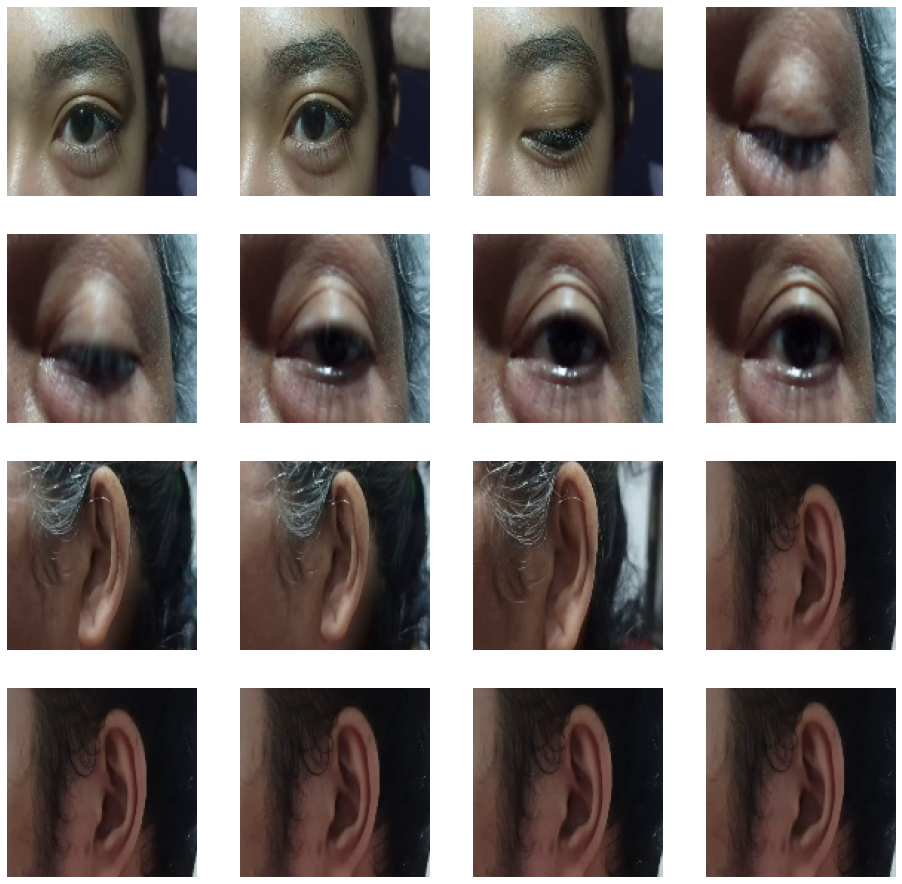

In [66]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_belly_pix = [os.path.join(eye_train, fname) 
                for fname in train_eye_names[pic_index-8:pic_index]]
next_ear_pix = [os.path.join(ear_train, fname) 
                for fname in train_ear_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_belly_pix+next_ear_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

# Building the Model #1

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding = 'same', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #tf.keras.layers.BatchNormalization(),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding = 'same',),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding = 'same',),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(8, (3,3), activation='relu', padding = 'same',),
    tf.keras.layers.MaxPooling2D(2,2),
    #tf.keras.layers.BatchNormalization(),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [ ]:
model.summary()

# Building the Model #2

In [67]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='relu'),
    tf.keras.layers.Dense(70, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 16)        1168      
                                                                 
 average_pooling2d (AverageP  (None, 30, 30, 16)       0         
 ooling2D)                                                       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0

# LeNet 5

In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(6, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.AveragePooling2D(),

    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.AveragePooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation = 'relu'),
    tf.keras.layers.Dense(84, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')
])

# VGG like

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.1),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0         
 2D)                                                    

# Compiling Model

In [68]:
import tensorflow.keras.optimizers as opt

from keras import backend as K
K.clear_session()

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=opt.Adam(learning_rate=0.001),
              metrics=['accuracy',f1_m])

# Handling Imbalance Dataset

In [69]:
from sklearn.utils import class_weight 
import numpy as np

class_weights = class_weight.compute_class_weight(
           class_weight='balanced',
            classes=np.unique(train_generator.classes), 
            y=train_generator.classes)

train_class_weights = dict(enumerate(class_weights))

# Training Model

In [70]:
history = model.fit(
      train_generator,  
      epochs=15,
      validation_data = validation_generator,
      verbose=1,
      class_weight=train_class_weights
      
      #callbacks=[
       #     tf.keras.callbacks.LearningRateScheduler(
        #    lambda epoch: 1e-3 * 10 ** (epoch / 30)
        #)
    #]
      )

Epoch 1/15
13/13 [==============================] - 14s 1s/step - loss: 1.5759 - accuracy: 0.3796 - f1_m: 0.0000e+00 - val_loss: 1.4989 - val_accuracy: 0.5435 - val_f1_m: 0.0380
Epoch 2/15
13/13 [==============================] - 7s 573ms/step - loss: 1.3468 - accuracy: 0.6082 - f1_m: 0.1741 - val_loss: 1.3875 - val_accuracy: 0.5652 - val_f1_m: 0.3086
Epoch 3/15
13/13 [==============================] - 8s 586ms/step - loss: 1.1526 - accuracy: 0.6408 - f1_m: 0.5152 - val_loss: 1.0488 - val_accuracy: 0.6652 - val_f1_m: 0.5812
Epoch 4/15
13/13 [==============================] - 8s 585ms/step - loss: 0.9834 - accuracy: 0.6867 - f1_m: 0.6409 - val_loss: 0.8922 - val_accuracy: 0.7000 - val_f1_m: 0.6628
Epoch 5/15
13/13 [==============================] - 8s 595ms/step - loss: 0.8699 - accuracy: 0.7376 - f1_m: 0.7001 - val_loss: 0.8268 - val_accuracy: 0.7261 - val_f1_m: 0.7236
Epoch 6/15
13/13 [==============================] - 8s 599ms/step - loss: 0.7905 - accuracy: 0.7783 - f1_m: 0.7518 - v

# Visualizing Evaluation

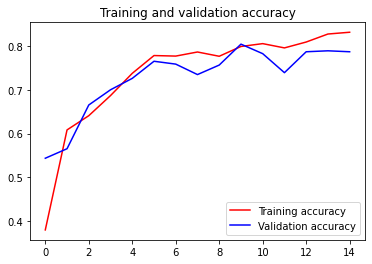

<Figure size 432x288 with 0 Axes>

In [71]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

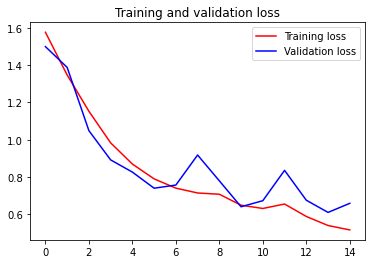

<Figure size 432x288 with 0 Axes>

In [72]:
epp = range(len(loss))
plt.plot(epp, loss, 'r', label='Training loss')
plt.plot(epp, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

# Predict

In [ ]:
"""
import numpy as np 
import cv2

image = cv2.imread("Nose_105.jpg")
image = cv2.resize(image, (128,128))
image = np.reshape(image,[1,128,128,3])
prediction = model.predict(image) 
print("prediction:", prediction)
"""

In [13]:
# I think this code doesn't work well

import numpy as np
ear_url = "https://images.everydayhealth.com/images/pain-management/ear-pain/what-is-ear-pain-722x406.jpg"
ear_path = tf.keras.utils.get_file('what-is-ear-pain-722x406', origin=ear_url)

img = tf.keras.utils.load_img(
    ear_path, target_size=(128, 128)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to Ear with a 40.46 percent confidence.


# Predictions


4/4 [==============================] - 1s 204ms/step


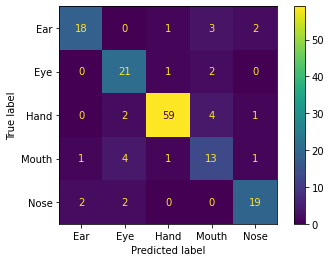

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
import matplotlib.pyplot as plt
#from sklearn.metrics import plot_confusion_matrix

predictions_1 = model.predict(x=test_generator, verbose = 1)
test_generator.classes
cm = confusion_matrix(y_true=test_generator.classes, y_pred = np.argmax(predictions_1, axis = -1))
test_generator.class_indices
cm_plot_labels = class_names
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=cm_plot_labels)
disp.plot()
plt.show()
#plot_confusion_matrix (cm=cm, classes = cm_plot_labels, title = 'Confusion Matrix')

# Best Learning Rate

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np 

rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False 

plt.plot(
    np.arange(1, 101), 
    history.history['loss'], 
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history.history['accuracy'], 
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101), 
    history.history['lr'], 
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates, 
    history.history['loss'], 
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

# Save Model

In [15]:
# EXERCISE: Use the tf.saved_model API to save your model in the SavedModel format. 
export_dir = r"D:\Kuliah\Kulon\SM 6\Bangkit\ExportModel"

# YOUR CODE HERE
tf.saved_model.save(model, export_dir)

INFO:tensorflow:Assets written to: D:\Kuliah\Kulon\SM 6\Bangkit\ExportModel\assets


# TFLite Converter

In [17]:
import pathlib 
TFLite_dir = r"D:\Kuliah\Kulon\SM 6\Bangkit\TFLite\model.tflite"
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir) # path to the SavedModel directory
converter.optimizations = [tf.lite.Optimize.DEFAULT]


tflite_model = converter.convert()

tflite_model_file = pathlib.Path(TFLite_dir)
tflite_model_file.write_bytes(tflite_model)

4245360

# Test the Model with TFLite Interpreter

In [ ]:
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_content=tflite_model)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [ ]:
# Gather results for the randomly sampled test images
predictions = []
test_labels = []
test_images = []

for img, label in test_batches.take(50):
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    test_labels.append(label[0])
    test_images.append(np.array(img))

In [ ]:
#@title Utility functions for plotting
# Utilities for plotting

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    img = np.squeeze(img)
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    
    if predicted_label == true_label.numpy():
        color = 'green'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(list(range(10)), class_names, rotation='vertical')
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array[0])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
#@title Visualize the outputs { run: "auto" }
index = 12 #@param {type:"slider", min:1, max:50, step:1}
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(index, predictions, test_labels, test_images)
plt.show()
plot_value_array(index, predictions, test_labels)
plt.show()